In [1]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd

In [2]:
train_dataset = pd.read_csv("./dataset/train_features.csv")
test_dataset = pd.read_csv("./dataset/test_features.csv")

In [3]:
classes = train_dataset.personality.unique()
classes

array(['Agreeableness', 'Conscientiousness', 'Extraversion',
       'Neuroticism', 'Openness'], dtype=object)

In [4]:
target = {
    target_class: key
    for key, target_class in enumerate(classes)
}
target

{'Agreeableness': 0,
 'Conscientiousness': 1,
 'Extraversion': 2,
 'Neuroticism': 3,
 'Openness': 4}

In [5]:
train_dataset.personality = train_dataset.personality.map(target)
test_dataset.personality = test_dataset.personality.map(target)

In [6]:
train_dataset

,letter_slant,line_slant,letter_size,word_spacing,personality
0,13.980637,1.075874,22.50,13.0,0
1,-11.017610,4.004173,18.50,25.0,0
2,24.000325,-0.836375,10.50,1.0,0
3,0.028662,-2.013475,28.00,1.0,0
4,9.966474,0.000000,51.00,25.0,0
...,...,...,...,...,...
172,6.982799,-4.124767,33.50,25.0,4
173,10.989471,0.000000,137.50,19.0,4
174,-6.001505,1.084344,65.00,44.0,4
175,15.969017,-0.804346,36.75,14.0,4


In [7]:
x_train = []
y_train = []

for i in range(train_dataset.shape[0]):
    x_train.append([train_dataset['letter_slant'][i],
                    train_dataset['line_slant'][i],
                    train_dataset['letter_size'][i],
                    train_dataset['word_spacing'][i]])
    y_train.append([train_dataset['personality'][i]])

x_test = []
y_test = []

for i in range(test_dataset.shape[0]):
    x_test.append([test_dataset['letter_slant'][i],
                    test_dataset['line_slant'][i],
                    test_dataset['letter_size'][i],
                    test_dataset['word_spacing'][i]])
    y_test.append([test_dataset['personality'][i]])

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [9]:
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 2,565
Trainable params: 2,565
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
epoch = 100
history = model.fit(x_train, y_train, epochs=epoch, batch_size=16, verbose=0)

In [12]:
model.evaluate(x_train, y_train)

6/6 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1695


[nan, 0.16949152946472168]

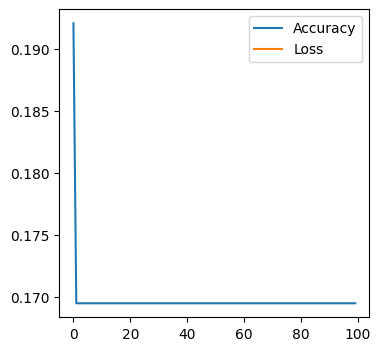

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.plot(range(epoch), history.history['accuracy'], label="Accuracy")
plt.plot(range(epoch), history.history['loss'], label="Loss")
plt.legend(loc="best")
plt.show()

In [14]:
model.predict(np.array([x_test[1]]))

1/1 [==============================] - 0s 217ms/step


array([[nan, nan, nan, nan, nan]], dtype=float32)